In [ ]:
!pip install catboost imbalanced-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import drive
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/gdrive')

# Define dataset paths
dataset_paths = [
    "/content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_A.csv",
    "/content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_B.csv",
    "/content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_D.csv",
    "/content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_H.csv",
    "/content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_L.csv",
    "/content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_P.csv",
    "/content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_R.csv",
    "/content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_V.csv"
]
# Iterate through dataset paths and count levels in each
for path in dataset_paths:
    df = pd.read_csv(path)
    print(f"Level counts for {path}:")
    print(df['Level'].value_counts())  # Replace 'level' with the actual column name if different
    print("\n" + "-"*50 + "\n")



Mounted at /content/gdrive
Level counts for /content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_A.csv:
Level
Moderate    33057
Unknown     14767
Major        4906
Minor        3637
Name: count, dtype: int64

--------------------------------------------------

Level counts for /content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_B.csv:
Level
Moderate    7359
Unknown     4242
Major       2739
Minor        800
Name: count, dtype: int64

--------------------------------------------------

Level counts for /content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_D.csv:
Level
Moderate    13519
Unknown      7833
Major        2314
Minor        2015
Name: count, dtype: int64

--------------------------------------------------

Level counts for /content/gdrive/MyDrive/MAJOR PROJECT/ddinter_downloads_code_H.csv:
Level
Moderate    7051
Unknown     2766
Major       1203
Minor        707
Name: count, dtype: int64

--------------------------------------------------

Level counts 

(222383, 5)
Level
Moderate    130367
Unknown      47182
Major        33896
Minor        10938
Name: count, dtype: int64
   DDInterID_A              Drug_A  DDInterID_B        Drug_B     Level
0  DDInter1263          Naltrexone     DDInter1      Abacavir  Moderate
1     DDInter1            Abacavir  DDInter1348      Orlistat  Moderate
2    DDInter58  Aluminum hydroxide   DDInter582  Dolutegravir     Major
3   DDInter112          Aprepitant   DDInter582  Dolutegravir     Minor
4   DDInter138         Attapulgite   DDInter582  Dolutegravir     Major
(160235, 5)
Level
Moderate    96675
Unknown     29813
Major       26914
Minor        6833
Name: count, dtype: int64


<ipython-input-3-7b92f982c2d7>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


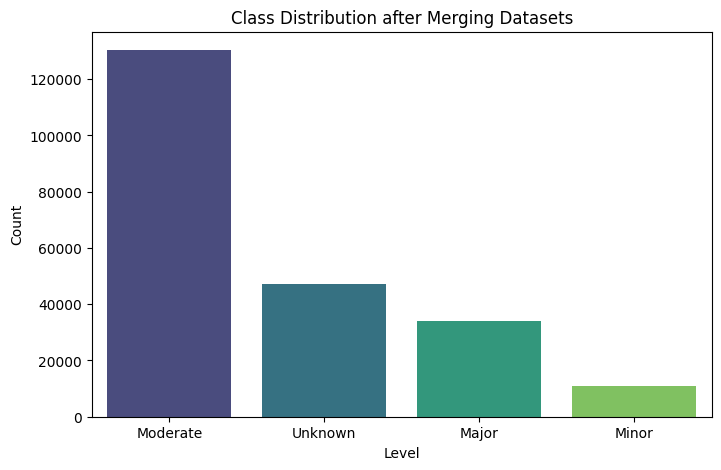

<ipython-input-3-7b92f982c2d7>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


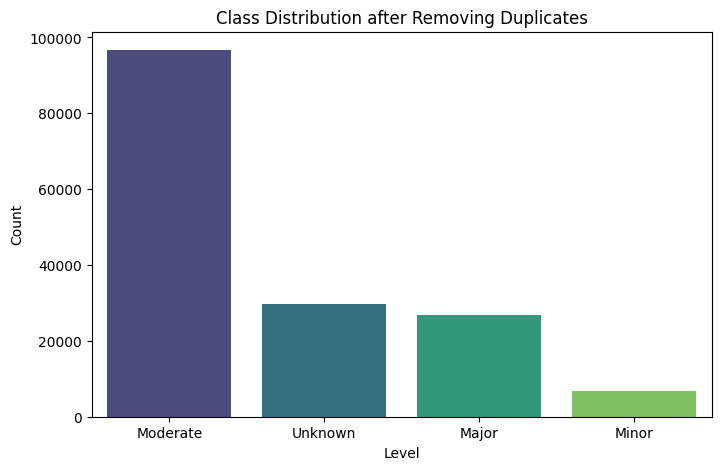

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if files exist before reading
valid_paths = [path for path in dataset_paths if os.path.exists(path)]
if not valid_paths:
    raise FileNotFoundError("No valid CSV files found. Please check the file paths in Google Drive.")

# Load and merge datasets
dataframes = [pd.read_csv(path) for path in valid_paths]
df = pd.concat(dataframes, axis=0, ignore_index=True)
print(df.shape)

# Count occurrences of each level after merging
level_counts_before = df['Level'].value_counts()
print(level_counts_before)

# Remove duplicates
df.drop_duplicates(inplace=True)
print(df.head())
print(df.shape)

# Count occurrences of each level after removing duplicates
level_counts_after = df['Level'].value_counts()
print(level_counts_after)

# Function to plot class distribution
def plot_class_distribution(counts, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    plt.xlabel("Level")
    plt.ylabel("Count")
    plt.title(title)
    plt.xticks(rotation=0)
    plt.show()

# Plot class distribution before and after removing duplicates
plot_class_distribution(level_counts_before, "Class Distribution after Merging Datasets")
plot_class_distribution(level_counts_after, "Class Distribution after Removing Duplicates")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Level' column and drug names to lowercase to handle case sensitivity
df['Level'] = df['Level'].str.lower()
df['Drug_A'] = df['Drug_A'].str.lower()
df['Drug_B'] = df['Drug_B'].str.lower()

# Encode the "Level" column
encoder = LabelEncoder()
df['Level'] = encoder.fit_transform(df['Level'])

#  Get the mapping of encoded values to original levels
level_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Print the mapping
print("\n Label Encoding Mapping (After Handling Case Sensitivity):")
for original, encoded in level_mapping.items():
    print(f"{encoded} -> {original}")

#  Combine Drug_A and Drug_B into a single text column
df['text'] = df['Drug_A'] + " " + df['Drug_B']



 Label Encoding Mapping (After Handling Case Sensitivity):
0 -> major
1 -> minor
2 -> moderate
3 -> unknown


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#  Apply CountVectorizer (1,2-gram model)
vectorizer = CountVectorizer(ngram_range=(1,2), max_features=5000)
X = vectorizer.fit_transform(df['text'])  # Feature Extraction
y = df['Level']  # Target Variable

#  Apply Instance Hardness Threshold (IHT) for Undersampling
from catboost import CatBoostClassifier

iht = InstanceHardnessThreshold(random_state=42, n_jobs=-1, estimator=CatBoostClassifier(verbose=0))
X_resampled, y_resampled = iht.fit_resample(X, y)

#  Check Shapes Before Fixing
#print("\n Before Fixing Shape Issue:")
#print("X_resampled shape:", X_resampled.shape)
#print("y_resampled shape:", y_resampled.shape)

#  Ensure class balance while keeping correct shape
min_class_count = min(np.bincount(y_resampled))
X_balanced, y_balanced = [], []

for class_label in np.unique(y_resampled):
    idx = np.where(y_resampled == class_label)[0][:min_class_count]
    X_balanced.append(X_resampled[idx])
    y_balanced.append(y_resampled[idx])

#  Fix Shape Issues Using vstack() for Sparse Matrices
from scipy.sparse import vstack

if isinstance(X_resampled, np.ndarray):
    X_resampled = np.vstack(X_balanced)
else:
    X_resampled = vstack(X_balanced)  # Fix for sparse matrices

y_resampled = np.concatenate(y_balanced)

#  Verify Shapes After Fixing
print("\n Fixed Shapes After Balancing:")
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

# Count the number of each level after undersampling
print("\n Level Distribution After IHT Undersampling:")
print(pd.Series(y_resampled).value_counts())


 Fixed Shapes After Balancing:
X_resampled shape: (27332, 5000)
y_resampled shape: (27332,)

 Level Distribution After IHT Undersampling:
0    6833
1    6833
2    6833
3    6833
Name: count, dtype: int64



 Level Distribution After IHT Undersampling:
0    6833
1    6833
2    6833
3    6833
Name: count, dtype: int64


<ipython-input-6-7942d8ef452e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts_after_iht.index, y=level_counts_after_iht.values, palette="coolwarm")


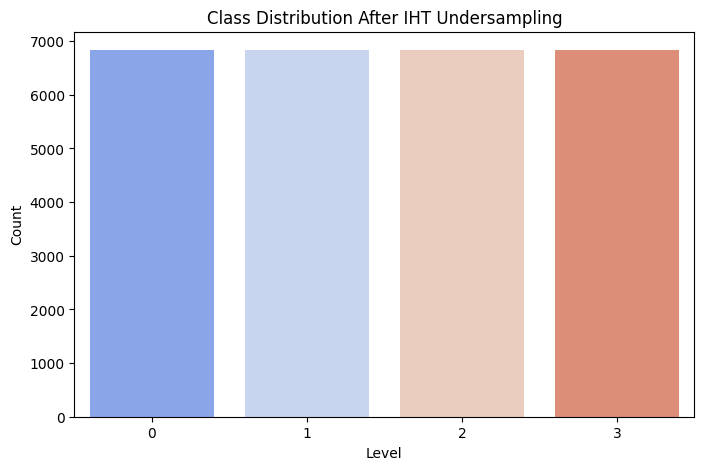

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Count the number of each level after IHT undersampling
level_counts_after_iht = pd.Series(y_resampled).value_counts()

print("\n Level Distribution After IHT Undersampling:")
print(level_counts_after_iht)

#  Plot class distribution after IHT undersampling
plt.figure(figsize=(8, 5))
sns.barplot(x=level_counts_after_iht.index, y=level_counts_after_iht.values, palette="coolwarm")
plt.xlabel("Level")
plt.ylabel("Count")
plt.title("Class Distribution After IHT Undersampling")
plt.xticks(rotation=0)
plt.show()


In [ ]:
#  Split data into 80-20 train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
#  Import Models
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from catboost import CatBoostClassifier

#  Define models
models = {
    "SGDClassifier": CalibratedClassifierCV(SGDClassifier(loss="log_loss", penalty="l2", alpha=1e-5, max_iter=2000, random_state=42), cv=3),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

#  Initialize Results Dictionary
results_iht = {name: {"Train_Precision": None, "Train_Recall": None, "Train_F1-Score": None, "Train_Accuracy": None,
                      "Test_Precision": None, "Test_Recall": None, "Test_F1-Score": None, "Test_Accuracy": None}
               for name in models}

#  Convert Data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

#  Train and Evaluate Models
for name, model in models.items():
    try:
        model.fit(X_train, y_train)

        # Predictions on train and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training Metrics
        train_precision = precision_score(y_train, y_train_pred, average='macro')
        train_recall = recall_score(y_train, y_train_pred, average='macro')
        train_f1 = f1_score(y_train, y_train_pred, average='macro')
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # Testing Metrics
        test_precision = precision_score(y_test, y_test_pred, average='macro')
        test_recall = recall_score(y_test, y_test_pred, average='macro')
        test_f1 = f1_score(y_test, y_test_pred, average='macro')
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store metrics in dictionary
        results_iht[name]["Train_Precision"] = train_precision
        results_iht[name]["Train_Recall"] = train_recall
        results_iht[name]["Train_F1-Score"] = train_f1
        results_iht[name]["Train_Accuracy"] = train_accuracy

        results_iht[name]["Test_Precision"] = test_precision
        results_iht[name]["Test_Recall"] = test_recall
        results_iht[name]["Test_F1-Score"] = test_f1
        results_iht[name]["Test_Accuracy"] = test_accuracy

    except Exception as e:
        print(f" Error training {name}: {str(e)}")

#  Print Final Results After IHT
print("\n Model Performance After IHT (Training & Testing Metrics):")
for model, metrics in results_iht.items():
    print(f"\n {model}:")
    print(f"    Train -> Precision={metrics['Train_Precision']:.4f}, Recall={metrics['Train_Recall']:.4f}, F1-Score={metrics['Train_F1-Score']:.4f}, Accuracy={metrics['Train_Accuracy']:.4f}")
    print(f"    Test  -> Precision={metrics['Test_Precision']:.4f}, Recall={metrics['Test_Recall']:.4f}, F1-Score={metrics['Test_F1-Score']:.4f}, Accuracy={metrics['Test_Accuracy']:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.229144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1944
[LightGBM] [Info] Number of data points in the train set: 21865, number of used features: 967
[LightGBM] [Info] Start training from score -1.386340
[LightGBM] [Info] Start training from score -1.386157
[LightGBM] [Info] Start training from score -1.386340
[LightGBM] [Info] Start training from score -1.386340


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:23:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Model Performance After IHT (Training & Testing Metrics):

 SGDClassifier:
    Train -> Precision=0.9955, Recall=0.9955, F1-Score=0.9955, Accuracy=0.9955
    Test  -> Precision=0.9869, Recall=0.9868, F1-Score=0.9868, Accuracy=0.9868

 LightGBM:
    Train -> Precision=0.9839, Recall=0.9838, F1-Score=0.9837, Accuracy=0.9838
    Test  -> Precision=0.9770, Recall=0.9768, F1-Score=0.9767, Accuracy=0.9768

 CatBoost:
    Train -> Precision=0.9812, Recall=0.9809, F1-Score=0.9809, Accuracy=0.9809
    Test  -> Precision=0.9752, Recall=0.9747, F1-Score=0.9747, Accuracy=0.9748

 XGBoost:
    Train -> Precision=0.9751, Recall=0.9749, F1-Score=0.9750, Accuracy=0.9749
    Test  -> Precision=0.9675, Recall=0.9673, F1-Score=0.9673, Accuracy=0.9673

 Logistic Regression:
    Train -> Precision=0.9926, Recall=0.9925, F1-Score=0.9925, Accuracy=0.9925
    Test  -> Precision=0.9850, Recall=0.9848, F1-Score=0.9848, Accuracy=0.9848

 Random Forest:
    Train -> Precision=1.0000, Recall=1.0000, F1-Score=1.0

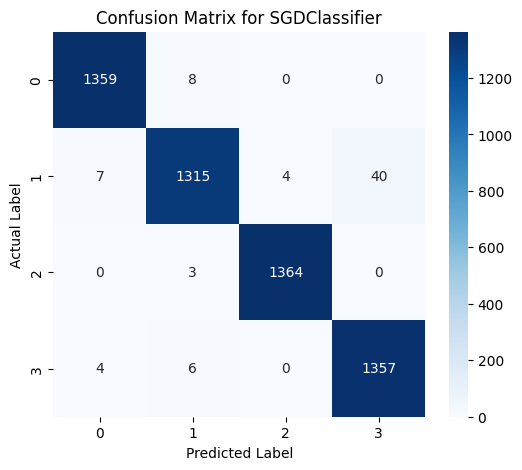

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


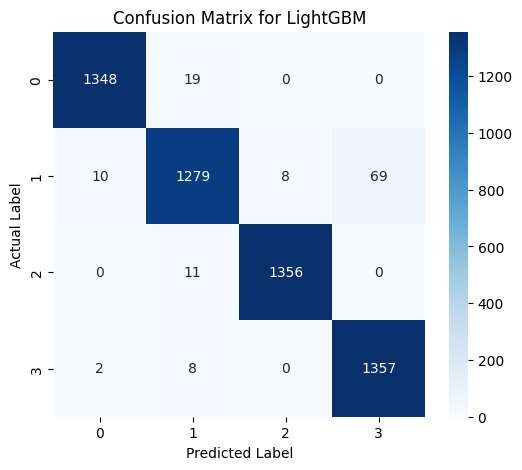

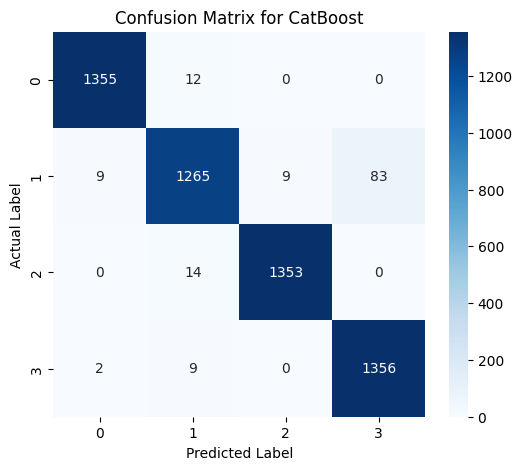

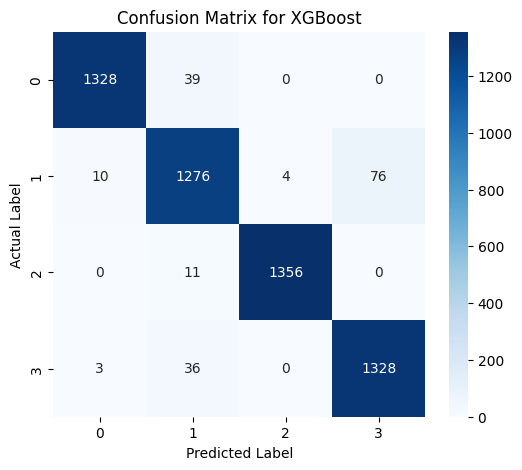

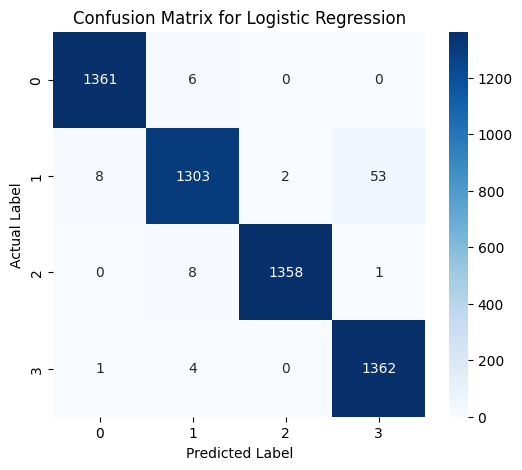

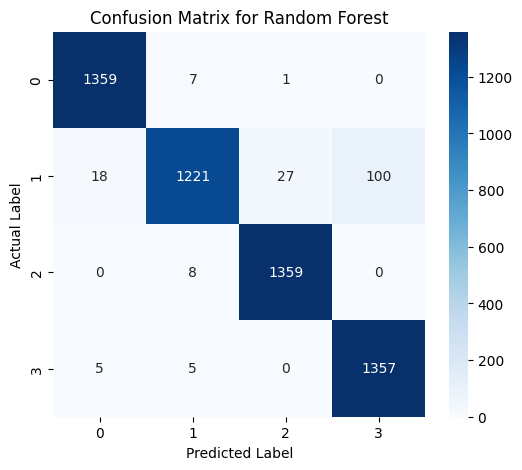

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#  Iterate through all models and plot their confusion matrices
for name, model in models.items():
    try:
        y_test_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_test_pred)

        #  Plot Confusion Matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel("Predicted Label")
        plt.ylabel("Actual Label")
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

    except Exception as e:
        print(f"Error generating confusion matrix for {name}: {str(e)}")


In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

#  Label Encoding Mapping (After Handling Case Sensitivity)
interaction_mapping = {
    0: "major",
    1: "minor",
    2: "moderate",
    3: "unknown"
}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SGD Classifier": SGDClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Train and evaluate models
model_scores = {}  # Store F1-scores for each model
best_model_name = None
best_model = None
best_f1 = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='macro')
    model_scores[name] = f1  # Store F1-score

    # Ensure the model with the highest F1-score is selected
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name
        best_model = model  # Store the best model instance

#  Explicitly force SGDClassifier if it has the highest F1-score
#if model_scores.get("SGD Classifier", 0) == best_f1:
#    best_model_name = "SGD Classifier"
#    best_model = models["SGD Classifier"]

print(f"Using the best model: {best_model_name} with F1-Score: {best_f1:.4f}")

#  Function to predict drug interaction level
def predict_interaction(drug1, drug2):
    # Check if the exact pair exists in the dataset
    match = df[((df['Drug_A'].str.lower() == drug1.lower()) & (df['Drug_B'].str.lower() == drug2.lower())) |
               ((df['Drug_A'].str.lower() == drug2.lower()) & (df['Drug_B'].str.lower() == drug1.lower()))]

    if not match.empty:
        return interaction_mapping.get(match['Level'].values[0], "unknown")  # Return dataset value if found

    # Otherwise, use the trained ML model
    input_text = vectorizer.transform([drug1.lower() + "|" + drug2.lower()])
    prediction = best_model.predict(input_text)

    # Convert numerical prediction to categorical label
    interaction_label = interaction_mapping.get(prediction[0], "unknown")

    return interaction_label

#  Interactive Prediction Loop
while True:
    drug1 = input("\nEnter Drug 1 name (or 'exit' to stop): ").strip()
    if drug1.lower() == 'exit':
        break
    drug2 = input("Enter Drug 2 name: ").strip()

    interaction_level = predict_interaction(drug1, drug2)
    print(f"The predicted interaction level between {drug1} and {drug2} is: {interaction_level}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.128907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1944
[LightGBM] [Info] Number of data points in the train set: 21865, number of used features: 967
[LightGBM] [Info] Start training from score -1.386340
[LightGBM] [Info] Start training from score -1.386157
[LightGBM] [Info] Start training from score -1.386340
[LightGBM] [Info] Start training from score -1.386340


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Using the best model: Logistic Regression with F1-Score: 0.9848

Enter Drug 1 name (or 'exit' to stop): Naltrexone 
Enter Drug 2 name: Abacavir 
The predicted interaction level between Naltrexone and Abacavir is: moderate

Enter Drug 1 name (or 'exit' to stop): Attapulgite
Enter Drug 2 name:  Dolutegravir 
The predicted interaction level between Attapulgite and Dolutegravir is: major

Enter Drug 1 name (or 'exit' to stop): Aprepitant 
Enter Drug 2 name: Dolutegravir
The predicted interaction level between Aprepitant and Dolutegravir is: minor

Enter Drug 1 name (or 'exit' to stop): Nalidixic acid
Enter Drug 2 name: Alosetron
The predicted interaction level between Nalidixic acid and Alosetron is: moderate

Enter Drug 1 name (or 'exit' to stop): exit


In [ ]:
import joblib
from google.colab import files
#  Save the best trained model
joblib.dump(best_model, "ddi_model.pkl")
files.download("ddi_model.pkl")

#  Save the vectorizer
joblib.dump(vectorizer, "vectorizer.pkl")
files.download("vectorizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>